<a href="https://colab.research.google.com/github/Paduspan/CMS/blob/main/CMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Data from Google Drive to Google Colab

In [1]:
import pandas as pd 
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/Data Science"

Prescriber_CodeBook.pdf  Prescriber.csv


In [3]:
DataFrame=pd.read_csv("/content/drive/My Drive/Data Science/Prescriber.csv")

### Dataset

In [4]:
DataFrame.head()

,Unnamed: 0,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,0,1003000126,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.15,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.37,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,...,NaN,351.0,15295.86,NaN,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,NaN,NaN,NaN,NaN,NaN,134.0,8050.71,114.0,*,NaN,NaN,*,NaN,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1,1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.74,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.73,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,...,NaN,628.0,33275.89,NaN,309.0,18310.81,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,NaN,8.47,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,NaN,NaN,81.0,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
2,2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,NaN,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,NaN,#,NaN,NaN,NaN,NaN,#,NaN,*,NaN,NaN,#,NaN,NaN,NaN,0.0,0.00,#,NaN,NaN,*,...,*,NaN,NaN,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1003000167,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,89403.0,7482.0,NV,US,Dentist,T,N,58,58.7,395.17,693,26.0,NaN,37.0,37.7,259.72,571.0,#,NaN,NaN,0.0,0.00,NaN,41.0,261.49,NaN,17.0,133.68,NaN,20.0,103.08,NaN,...,NaN,14.0,78.46,NaN,44.0,316.71,18.0,80.40,39.0,11.0,31.03,0.0,0.00,0.0,0.0,0.00,19.0,114.38,16.0,NaN,0.0,0.0,NaN,0.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.3362
4,4,1003000282,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,37243.0,1.0,TN,US,Nurse Practitioner,S,N,14,14.0,135.93,420,NaN,#,NaN,NaN,NaN,NaN,#,NaN,NaN,0.0,0.00,NaN,14.0,135.93,NaN,0.0,0.00,NaN,0.0,0.00,NaN,...,#,NaN,NaN,*,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
DataFrame.columns

Index(['Unnamed: 0', 'npi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress_flag', 'mapd_claim_count',
       'mapd_drug_cost', 'pdp_suppress_flag', '

In [6]:
# #drop Unnamed column
DataFrame.drop(['Unnamed: 0'],axis=1,inplace=True)
columns=DataFrame.columns

In [7]:
#Example before preprocessing
DataFrame.loc[:,'generic_suppress_flag'].head(20)

0     NaN
1     NaN
2       #
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10      #
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16      #
17      #
18    NaN
19    NaN
Name: generic_suppress_flag, dtype: object

### Data Shape before preprocessing

In [8]:
DataFrame.shape

(1014675, 81)

In [9]:
DataFrame.dtypes

npi                                 int64
nppes_credentials                  object
nppes_provider_gender              object
nppes_entity_code                  object
nppes_provider_street1             object
                                   ...   
beneficiary_race_nat_ind_count    float64
beneficiary_race_other_count      float64
beneficiary_nondual_count         float64
beneficiary_dual_count            float64
beneficiary_average_risk_score    float64
Length: 81, dtype: object

In [10]:
DataFrame.isnull().sum().sum()

25878182

In [11]:
x = DataFrame.columns.to_series().groupby(DataFrame.dtypes).groups
print(x)
print('-----------------------------------------------------------------------')
# DataFrame.columns.to_series().groupby(DataFrame.dtypes).sum()
DataFrame_numerical = DataFrame.select_dtypes(exclude='object')
DataFrame_categorical= DataFrame.select_dtypes(include='object')

print('DataFrame_numerical: \n ',DataFrame_numerical.shape,'\n', DataFrame_numerical.columns)
print('-----------------------------------------------------------------------')
print('DataFrame_categorical: \n',DataFrame_categorical.shape,'\n', DataFrame_categorical.columns)

{int64: ['npi', 'total_claim_count', 'total_day_supply'], float64: ['nppes_provider_zip5', 'nppes_provider_zip4', 'total_30_day_fill_count', 'total_drug_cost', 'bene_count', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65', 'brand_claim_count', 'brand_drug_cost', 'generic_claim_count', 'generic_drug_cost', 'other_claim_count', 'other_drug_cost', 'mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count', 'pdp_drug_cost', 'lis_claim_count', 'lis_drug_cost', 'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate', 'antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count', 'antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_count_ge65', 'average_age_of_beneficiari

In [12]:
DataFrame_numerical.head(3)

,npi,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.37,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,NaN,NaN,NaN,NaN,NaN,134.0,8050.71,114.0,NaN,NaN,NaN,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1,1003000142,43623.0,3536.0,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.74,10265.0,61.0,116.0,31794.97,821.0,19791.73,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.81,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,NaN,8.47,NaN,NaN,NaN,0.0,0.0,0.0,61.0,85.0,41.0,NaN,NaN,81.0,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
2,1003000159,29405.0,NaN,18,18.0,150.02,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Numerical variables
print('Count null \nDataFrame_numerical: \n \n',DataFrame_numerical.isnull().sum())

Count null 
DataFrame_numerical: 
 
 npi                                      0
nppes_provider_zip5                      1
nppes_provider_zip4                 113855
total_claim_count                        0
total_30_day_fill_count                  0
total_drug_cost                          0
total_day_supply                         0
bene_count                          126869
total_claim_count_ge65              220223
total_30_day_fill_count_ge65        220223
total_drug_cost_ge65                220223
total_day_supply_ge65               220223
bene_count_ge65                     447790
brand_claim_count                   446012
brand_drug_cost                     446012
generic_claim_count                 274021
generic_drug_cost                   274021
other_claim_count                   267286
other_drug_cost                     267286
mapd_claim_count                    216580
mapd_drug_cost                      216580
pdp_claim_count                     216580
pdp_drug_cost    

In [14]:
#Categorical variables
print('Count null \nDataFrame_categorical: \n \n',DataFrame_categorical.isnull().sum())

Count null 
DataFrame_categorical: 
 
 nppes_credentials                    41749
nppes_provider_gender                   22
nppes_entity_code                        0
nppes_provider_street1                   0
nppes_provider_street2              603961
nppes_provider_city                      0
nppes_provider_state                     0
nppes_provider_country                   0
specialty_description                    0
description_flag                         0
medicare_prvdr_enroll_status             0
ge65_suppress_flag                  794452
bene_count_ge65_suppress_flag       566885
brand_suppress_flag                 568663
generic_suppress_flag               740654
other_suppress_flag                 747389
mapd_suppress_flag                  798095
pdp_suppress_flag                   798095
lis_suppress_flag                   800266
nonlis_suppress_flag                800266
antipsych_ge65_suppress_flag        882284
antipsych_bene_ge65_suppress_flg    800442
dtype: int64


## K^2 Normality Test
### If an index is normally distributed we use MEAN for handling missing values, else MEDIAN. we use MODE for Object types.

In [15]:
   from scipy.stats import normaltest
j=0
for i in DataFrame_numerical:
  j+=1
  # print(j)
# The D'Agostino's K^2 Normality Test

  G=[]
  NG=[]
  stat, p = normaltest(DataFrame_numerical.iloc[:, j-1])
  # print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
      # print(i)
      print(' Probably Gaussian : ',[j, i],',', end='')
  
  else:
      # print(i)
      print(' Probably Not Gaussian : ', [j, i],',', end='')

 Probably Not Gaussian :  [1, 'npi'] , Probably Not Gaussian :  [2, 'nppes_provider_zip5'] , Probably Not Gaussian :  [3, 'nppes_provider_zip4'] , Probably Not Gaussian :  [4, 'total_claim_count'] , Probably Not Gaussian :  [5, 'total_30_day_fill_count'] , Probably Not Gaussian :  [6, 'total_drug_cost'] , Probably Not Gaussian :  [7, 'total_day_supply'] , Probably Not Gaussian :  [8, 'bene_count'] , Probably Not Gaussian :  [9, 'total_claim_count_ge65'] , Probably Not Gaussian :  [10, 'total_30_day_fill_count_ge65'] , Probably Not Gaussian :  [11, 'total_drug_cost_ge65'] , Probably Not Gaussian :  [12, 'total_day_supply_ge65'] , Probably Not Gaussian :  [13, 'bene_count_ge65'] , Probably Not Gaussian :  [14, 'brand_claim_count'] , Probably Not Gaussian :  [15, 'brand_drug_cost'] , Probably Not Gaussian :  [16, 'generic_claim_count'] , Probably Not Gaussian :  [17, 'generic_drug_cost'] , Probably Not Gaussian :  [18, 'other_claim_count'] , Probably Not Gaussian :  [19, 'other_drug_cost'

### Estimate Mean and Median at "nppes_provider_zip5", as an example

In [16]:
print(' "nppes_provider_zip5" \nMean:  ',DataFrame_numerical.iloc[:, 1].mean())
print('Median:  ',DataFrame_numerical.iloc[:, 1].median())
# print('Mode:  ',DataFrame_numerical.iloc[:, 1].mode())

 "nppes_provider_zip5" 
Mean:   48079.889316174456
Median:   45154.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


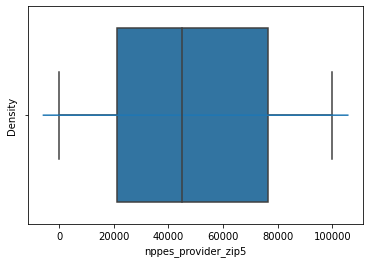

In [17]:
import seaborn as sns
# Box plot
sns.boxplot(DataFrame_numerical.iloc[:, 1])
# Distribution plot
sns.distplot(DataFrame_numerical.iloc[:, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


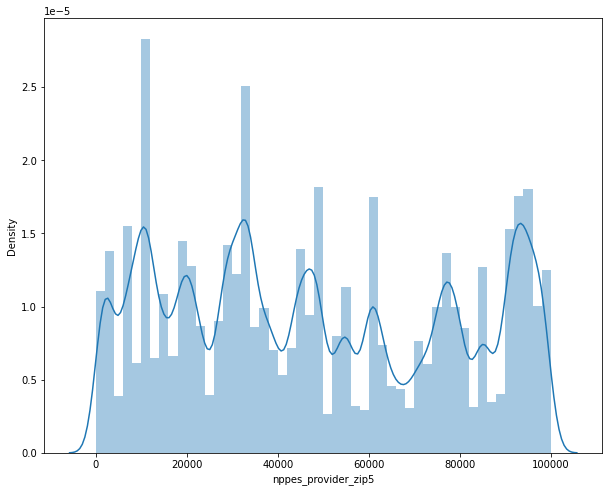

In [18]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(10,8))
sns.distplot(DataFrame_numerical.iloc[:, 1])

### Estimate Mean and Median at "total_drug_cost", as an example

In [19]:
print(' "total_drug_cost" \nMean:  ',DataFrame_numerical.iloc[:, 5].mean())
print('Median:  ',DataFrame_numerical.iloc[:, 5].median())
# print('Mode:  ',DataFrame_numerical.iloc[:, 5].mode())

 "total_drug_cost" 
Mean:   114807.66353309363
Median:   9881.13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


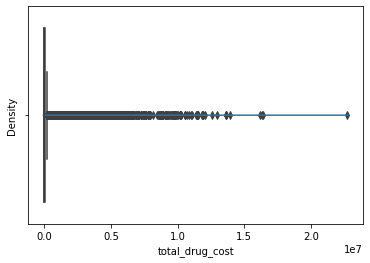

In [20]:
import seaborn as sns
# Box plot
sns.boxplot(DataFrame_numerical.iloc[:, 5])
# Distribution plot
sns.distplot(DataFrame_numerical.iloc[:, 5])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


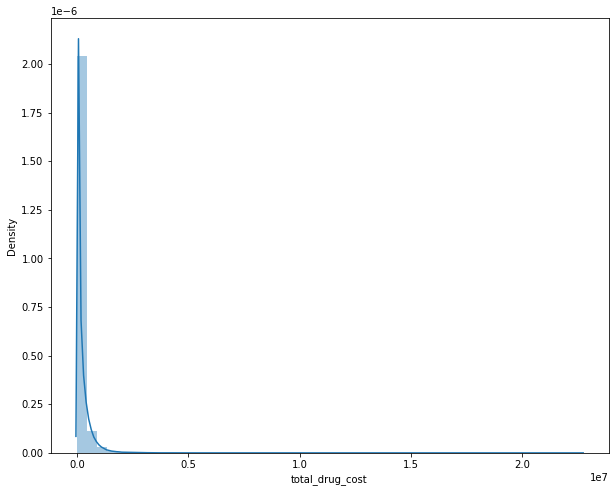

In [21]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(10,8))
sns.distplot(DataFrame_numerical.iloc[:, 5])

### Replacing Median and Mode for missing values

In [22]:
import numpy as np 
DataFrame.replace([' ','?', '#', '*'], np.nan, inplace=True)

#Function takes in the name of dataset.

def errorReplacer(data):
    df = data
    x = pd.DataFrame(df.isnull().sum())
    x = x[x[0] > 0]

    for i in x.index:
        if df[i].dtypes == 'float64':
            median = df[i].median()
            df[i].replace(np.nan, median, inplace = True)
            if df[i].dtypes == 'int64':
                df[i] = df[i].astype(int)
            elif df[i].dtypes == 'float64':
                pass
        elif df[i].dtypes == 'object':
            mode = df[i].mode()
            df[i] = df[i].replace({np.nan : mode.values})


errorReplacer(DataFrame)
print(DataFrame.head())


          npi  ... beneficiary_average_risk_score
0  1003000126  ...                         2.0266
1  1003000142  ...                         1.6538
2  1003000159  ...                         1.2276
3  1003000167  ...                         1.3362
4  1003000282  ...                         1.2276

[5 rows x 81 columns]


### Remained Null values

In [23]:
DataFrame.isnull().sum().sum()

11161425

In [24]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,pdp_claim_count,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.150,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.370,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,620.0,...,NaN,351.0,15295.86,NaN,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,NaN,0.0,0.0,NaN,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.740,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.730,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,688.0,...,NaN,628.0,33275.89,NaN,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,NaN,230.0,278.8,13305.705,6367.0,NaN,102.0,NaN,71.0,17913.89,NaN,316.0,7949.895,NaN,0.0,0.00,NaN,89.0,4578.96,NaN,208.0,...,NaN,126.0,7813.95,NaN,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [25]:
##Example after preprocessing
DataFrame.loc[:,'generic_suppress_flag'].head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: generic_suppress_flag, dtype: float64

### Identifying Columns contain NAN

In [26]:
NAN=DataFrame.columns[DataFrame.isna().any()].tolist()
print(NAN)

['ge65_suppress_flag', 'bene_count_ge65_suppress_flag', 'brand_suppress_flag', 'generic_suppress_flag', 'other_suppress_flag', 'mapd_suppress_flag', 'pdp_suppress_flag', 'lis_suppress_flag', 'nonlis_suppress_flag', 'antipsych_ge65_suppress_flag', 'antipsych_bene_ge65_suppress_flg']


In [27]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,pdp_claim_count,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.150,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.370,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,620.0,...,NaN,351.0,15295.86,NaN,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,NaN,0.0,0.0,NaN,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.740,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.730,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,688.0,...,NaN,628.0,33275.89,NaN,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,NaN,230.0,278.8,13305.705,6367.0,NaN,102.0,NaN,71.0,17913.89,NaN,316.0,7949.895,NaN,0.0,0.00,NaN,89.0,4578.96,NaN,208.0,...,NaN,126.0,7813.95,NaN,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [28]:
#drop columns which have NAN in all rows
DataFrame.drop(NAN,axis=1,inplace=True)
columns=DataFrame.columns

### Pure Dataset

In [29]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.740,10265.0,61.0,116.0,31794.97,821.0,19791.730,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,0.0,0.0,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [30]:
DataFrame.shape

(1014675, 70)

### Reform DataFrame_numerical and DataFrame_categorical [after eliminating columns that all were NAN]

In [31]:
z = DataFrame.columns.to_series().groupby(DataFrame.dtypes).groups
print(z)
print('-----------------------------------------------------------------------')
# DataFrame.columns.to_series().groupby(DataFrame.dtypes).sum()
DataFrame_numerical = DataFrame.select_dtypes(exclude='object')
DataFrame_categorical= DataFrame.select_dtypes(include='object')

print('DataFrame_numerical: \n ',DataFrame_numerical.shape,'\n', DataFrame_numerical.columns)
print('-----------------------------------------------------------------------')
print('DataFrame_categorical: \n',DataFrame_categorical.shape,'\n', DataFrame_categorical.columns)

{int64: ['npi', 'total_claim_count', 'total_day_supply'], float64: ['nppes_provider_zip5', 'nppes_provider_zip4', 'total_30_day_fill_count', 'total_drug_cost', 'bene_count', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65', 'brand_claim_count', 'brand_drug_cost', 'generic_claim_count', 'generic_drug_cost', 'other_claim_count', 'other_drug_cost', 'mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count', 'pdp_drug_cost', 'lis_claim_count', 'lis_drug_cost', 'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate', 'antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count', 'antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_count_ge65', 'average_age_of_beneficiari

In [32]:
DataFrame.isnull().sum().sum()

0

In [33]:
DataFrame.max()

npi                                    1992999866
nppes_credentials                 ZACHARY REICHER
nppes_provider_gender                           M
nppes_entity_code                               O
nppes_provider_street1                    ZRB 739
                                       ...       
beneficiary_race_nat_ind_count                358
beneficiary_race_other_count                  774
beneficiary_nondual_count                   23568
beneficiary_dual_count                      10681
beneficiary_average_risk_score            10.3912
Length: 70, dtype: object

In [34]:
DataFrame.min()

npi                                       1003000126
nppes_credentials                              (DDS)
nppes_provider_gender                              F
nppes_entity_code                                  I
nppes_provider_street1            # 1 BURDICK EXPY W
                                         ...        
beneficiary_race_nat_ind_count                     0
beneficiary_race_other_count                       0
beneficiary_nondual_count                          0
beneficiary_dual_count                             0
beneficiary_average_risk_score                0.2989
Length: 70, dtype: object

In [35]:
DataFrame.describe()

,npi,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06
mean,1.499846e+09,4.807989e+04,3.724659e+03,1.347907e+03,1.928596e+03,1.148077e+05,5.338034e+04,1.419844e+02,1.071794e+03,1.595121e+03,7.984384e+04,4.414422e+04,1.356715e+02,2.836143e+02,7.832199e+04,1.112070e+03,2.848598e+04,1.025313e+01,3.571989e+02,4.774174e+02,3.535614e+04,9.124698e+02,8.121695e+04,6.365325e+02,5.841879e+04,7.584194e+02,5.873747e+04,8.330086e+01,3.902359e+03,1.721660e+03,2.880897e+01,9.727873e+00,9.462469e+00,1.860483e+03,2.653976e+02,1.501963e+00,2.232601e+00,5.994085e+01,1.770165e+03,3.989357e+01,9.432037e+00,1.337531e+03,1.010203e+00,6.902157e+01,3.987892e+01,8.543471e+01,7.232366e+01,2.905907e+01,9.908355e+01,6.591450e+01,1.363556e+02,8.944361e+00,1.918183e+00,8.617915e+00,1.710883e-01,2.532722e-01,1.170668e+02,5.446033e+01,1.360579e+00
std,2.879233e+08,3.029933e+04,2.120459e+03,3.218246e+03,4.463711e+03,2.970736e+05,1.250020e+05,1.834417e+02,2.620618e+03,3.794333e+03,1.973353e+05,1.066790e+05,1.485124e+02,7.354392e+02,2.264247e+05,2.479750e+03,6.042660e+04,3.975132e+01,1.581803e+03,1.398180e+03,1.098002e+05,2.300617e+03,2.198183e+05,2.002397e+03,1.926714e+05,1.739674e+03,1.521389e+05,2.650627e+02,2.833261e+04,7.141847e+03,4.621373e+01,1.538691e+01,6.745667e+01,1.640843e+04,1.941530e+03,1.245025e+01,7.615466e+00,1.007640e+02,6.714438e+03,4.925827e+01,5.950090e+01,1.096003e+04,7.533239e+00,5.929920e+00,3.951460e+01,7.370498e+01,4.417661e+01,2.346562e+01,1.033811e+02,7.577784e+01,1.314470e+02,3.593214e+01,2.333729e+01,5.079777e+01,3.530689e+00,2.994223e+00,1.318495e+02,6.509357e+01,5.863979e-01
min,1.003000e+09,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

### Outliers

In [36]:
#drop 'npi' for visualizing Dataset
# #'npi' is something like serial number
# print(DataFrame_numerical)
DataFrame_numerical.drop(['npi'],axis=1,inplace=True)
N_columns=DataFrame_numerical.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


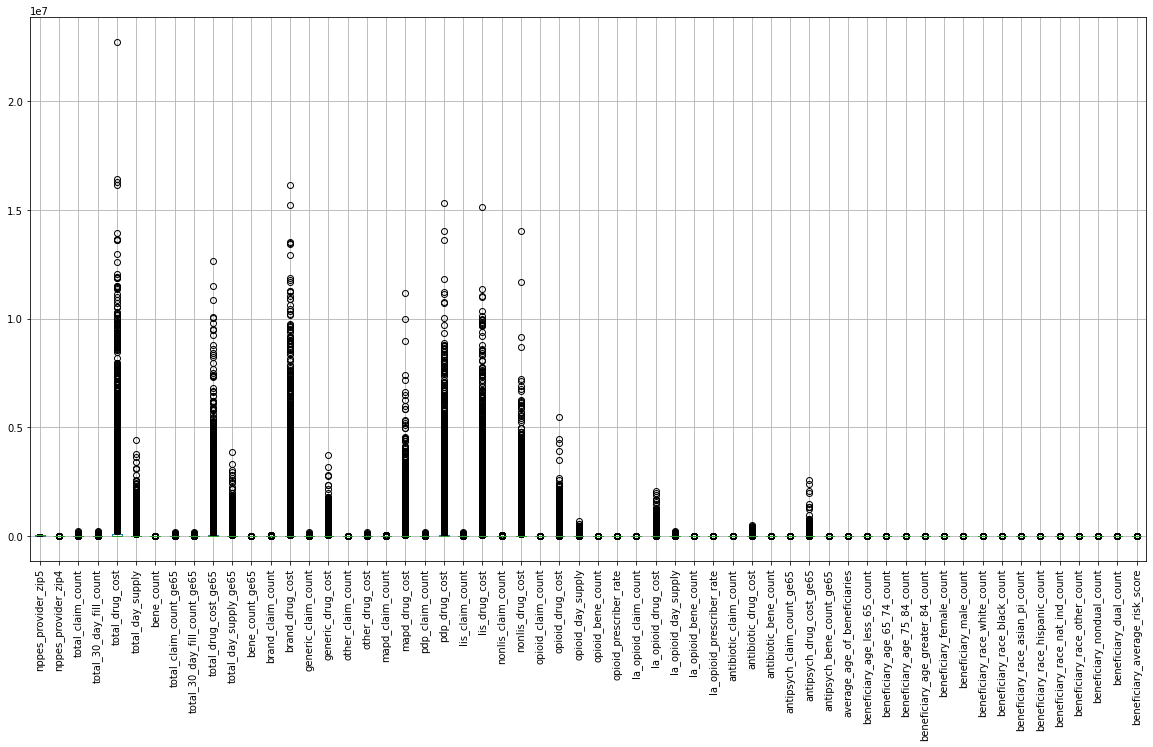

In [37]:
DataFrame_numerical.boxplot(figsize=(20,10), rot=90)

# Tukey (Detecting and Removing Outliers)
### The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3. Following Tukey, only the probable outliers are treated, which lie outside the outer fence.

In [38]:
# First Way *

# from scipy import stats
# import numpy as np
# #Tukey's method
# def tukeys_method(DataFrame, variable):
#     #Takes two parameters: dataframe & variable of interest as string
#     q1 = DataFrame[variable].quantile(0.25)
#     q3 = DataFrame[variable].quantile(0.75)
#     iqr = q3-q1
#     inner_fence = 1.5*iqr
#     outer_fence = 3*iqr
    
#     #inner fence lower and upper end
#     inner_fence_le = q1-inner_fence
#     inner_fence_ue = q3+inner_fence
    
#     #outer fence lower and upper end
#     outer_fence_le = q1-outer_fence
#     outer_fence_ue = q3+outer_fence
    
#     outliers_prob = []
#     outliers_poss = []
#     for index, x in enumerate(DataFrame[variable]):
#         if x <= outer_fence_le or x >= outer_fence_ue:
#             outliers_prob.append(index)
#     for index, x in enumerate(DataFrame[variable]):
#         if x <= inner_fence_le or x >= inner_fence_ue:
#             outliers_poss.append(index)
#     return outliers_prob, outliers_poss

# for i in DataFrame.columns:
#     probable_outliers_tm, possible_outliers_tm = tukeys_method(DataFrame, i)
#     print(probable_outliers_tm)

In [40]:
# Second Way **

import pandas as pd
import numpy as np

def drop_outliers(DataFrame_numerical, field_name):
    distance = 1.5 * (np.nanpercentile(DataFrame_numerical[field_name], 97) - np.nanpercentile(DataFrame_numerical[field_name], 3))
    DataFrame_numerical.drop(DataFrame_numerical[DataFrame_numerical[field_name] > distance + np.nanpercentile(DataFrame_numerical[field_name], 97)].index, inplace=True)
    DataFrame_numerical.drop(DataFrame_numerical[DataFrame_numerical[field_name] < np.nanpercentile(DataFrame_numerical[field_name], 3) - distance].index, inplace=True)

if __name__ == "__main__":
      # assuming DataFrame_numerical exists and contains numeric variables

    before=DataFrame_numerical.shape

    for column in DataFrame_numerical.columns:
        drop_outliers(DataFrame_numerical, column)

    after=DataFrame_numerical.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

In [41]:
print('DataFrame.shape before removing outliers :', before,
      '\nDataFrame.shape after removing outliers :',after )

DataFrame.shape before removing outliers : (1014675, 58) 
DataFrame.shape after removing outliers : (840526, 58)


In [42]:
DataFrame_numerical.head(3)

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,43623.0,3536.0,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.740,10265.0,61.0,116.0,31794.97,821.0,19791.730,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,0.0,0.0,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,29405.0,3333.0,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


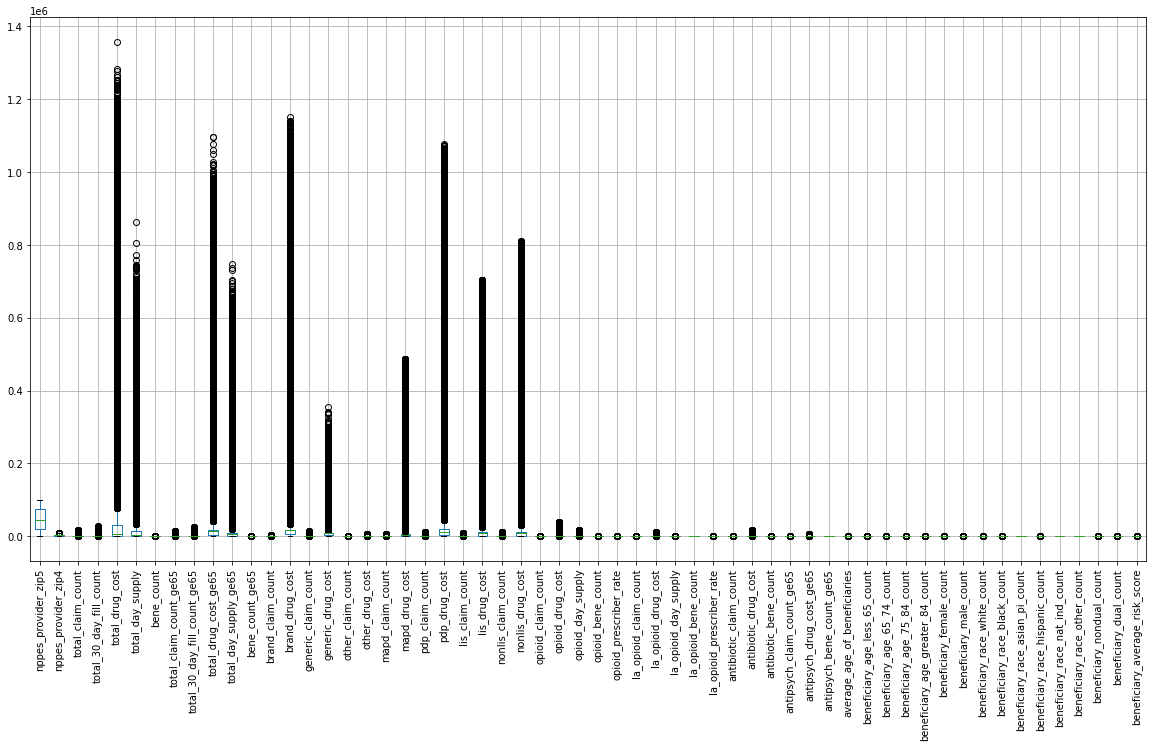

In [43]:
DataFrame_numerical.boxplot(figsize=(20,10), rot=90)